## Getting and parsing text data 

In [2]:
import requests
import pandas as pd

# request to access to the site
x = requests.get('https://www.gutenberg.org/cache/epub/1934/pg1934.txt')

# extract the text
text = x.text

# choosing the start and the end of the text
#start_index = text.find('SONGS OF INNOCENCE\r\n\r\n\r\n')
start_index = text.find('The Voice of the Ancient Bard')
start_index +=  len('The Voice of the Ancient Bard\r\n\r\n\r\n\r\n\r\n') 
end_index = text.find('*** END OF THE PROJECT GUTENBERG EBOOK SONGS OF INNOCENCE AND OF EXPERIENCE ***')


# selecting the text from the index onward
text = text[start_index:end_index]

# divide it in a list (each element is a poem -- title excluded)
poem_list = text.split('\r\n\r\n\r\n\r\n\r\n')

In [3]:
# added line as feature, not used test as index (seems not easy to manage to me)
df = pd.DataFrame(columns = ['line', 'line_number', 'stanza_number', 'poem_title', 'book_title'])

for poem in poem_list:
    if poem[:2] == '\r\n': # condition to fix the poem: 'THE LITTLE BLACK BOY'
        poem = poem[2:]
    if poem.upper() == poem: # check if this is the title of the book, if True set as book_title variable
        book_title = poem    
    else:
        stanza_list = poem.split('\r\n\r\n')
        stanza_number = 0 # not 1, at the first place there is the title
        line_numeber = 1 
        for stanza in stanza_list: # check if this is the title of the poem, if True set as poem_title variable
            if stanza.upper() == stanza:
                poem_title = stanza
            else:
                line_list = stanza.split('\r\n')
                #line_number = 1 # inizialise here if you want that the line reupdate every stanza
                for line in line_list:
                    if line == '':
                        line_numeber -= 1
                        pass # no empty rows in the dataframe
                    else:
                        dictionary = {'line' : line, 'line_number' : line_numeber, 'stanza_number' : stanza_number, 'poem_title' : poem_title, 'book_title' : book_title}
                        df = df.append(dictionary, ignore_index=True)
                    line_numeber +=1 # increasing the number of line
            stanza_number +=1 # increasing the number of stanza

df

,line,line_number,stanza_number,poem_title,book_title
0,"Piping down the valleys wild,",1,1,INTRODUCTION,SONGS OF INNOCENCE
1,"Piping songs of pleasant glee,",2,1,INTRODUCTION,SONGS OF INNOCENCE
2,"On a cloud I saw a child,",3,1,INTRODUCTION,SONGS OF INNOCENCE
3,And he laughing said to me:,4,1,INTRODUCTION,SONGS OF INNOCENCE
4,‘Pipe a song about a Lamb!’,5,2,INTRODUCTION,SONGS OF INNOCENCE
...,...,...,...,...,...
904,Tangled roots perplex her ways;,7,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
905,How many have fallen there!,8,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
906,They stumble all night over bones of the dead;,9,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
907,And feel—they know not what but care;,10,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE


In [4]:
# Easily change with df.set_index('line'), chance inplace to True if you want to modify the dataframe permanently 
df.set_index('line', inplace= False)

,line_number,stanza_number,poem_title,book_title
line,,,,
"Piping down the valleys wild,",1,1,INTRODUCTION,SONGS OF INNOCENCE
"Piping songs of pleasant glee,",2,1,INTRODUCTION,SONGS OF INNOCENCE
"On a cloud I saw a child,",3,1,INTRODUCTION,SONGS OF INNOCENCE
And he laughing said to me:,4,1,INTRODUCTION,SONGS OF INNOCENCE
‘Pipe a song about a Lamb!’,5,2,INTRODUCTION,SONGS OF INNOCENCE
...,...,...,...,...
Tangled roots perplex her ways;,7,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
How many have fallen there!,8,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
They stumble all night over bones of the dead;,9,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE


## Visualizing text data

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

<AxesSubplot:xlabel='poem_title', ylabel='line'>

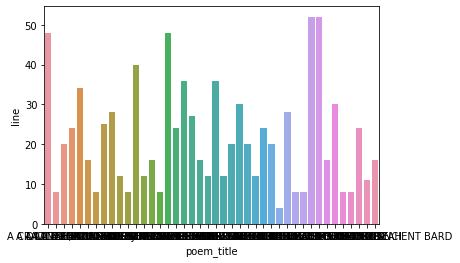

In [6]:
df_bar_plot = df.groupby('poem_title', as_index = False).count()

sns.barplot(data=df_bar_plot, x='poem_title', y='line')

<AxesSubplot:xlabel='line', ylabel='poem_title'>

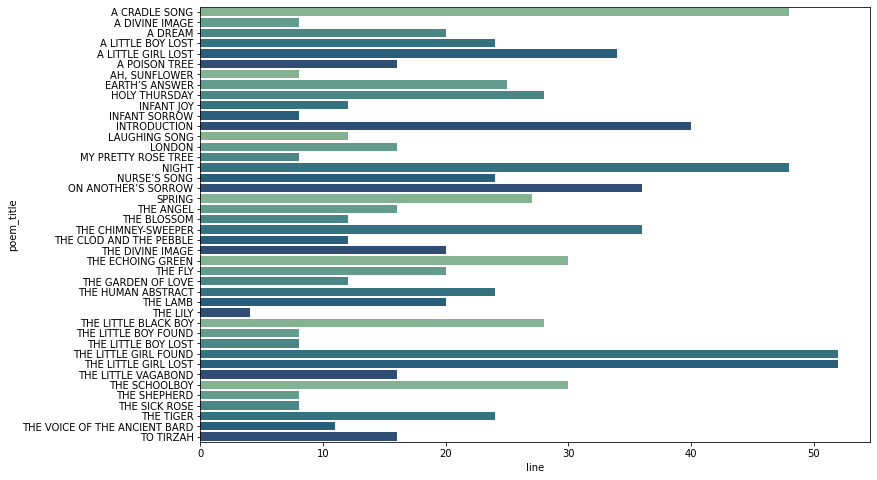

In [7]:
# not what requested but easier to understand and more clean

palette = sns.color_palette("crest", as_cmap=True)

fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=df_bar_plot, ax = ax, x='line', y='poem_title', orient= 'h', palette = sns.color_palette("crest", as_cmap=False))

#### Feature matrixes

In [8]:
list_line = list(df.line) #consider each line as a document 
list_line = list(map(lambda x: x.lower(), list_line)) # convert all in lower characthers
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)
dfm_line = vectorizer.fit_transform(list_line)
dfm_line

<909x1092 sparse matrix of type '<class 'numpy.float64'>'
	with 2692 stored elements in Compressed Sparse Row format>

In [19]:
# helper for list compreansion
def containing_blank_line(s:str):
    return '\r\n' in s

# removed the title of the books from the document, this will be the list of my document
list_poem_clean = [s for s in poem_list if containing_blank_line(s)]
list_poem_clean = poem_list

list_poem_clean = list(map(lambda x: x.lower(), list_poem_clean)) # convert all in lower characthers
list_poem_clean = list(map(lambda x: x.replace('\r\n', ''), list_poem_clean)) # remove unnecessary charachters
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)
dfm_poem = vectorizer.fit_transform(list_poem_clean)
dfm_poem


<50x1199 sparse matrix of type '<class 'numpy.float64'>'
	with 2209 stored elements in Compressed Sparse Row format>

In [10]:
vectorizer = CountVectorizer(stop_words="english")
df = df[pd.notna(df["line"])].reset_index(drop=True)
dfm = vectorizer.fit_transform(df["line"])
dfm

# create a daftame with columns = ['count','words', 'book']
tidy_dfm = pd.DataFrame()
features = vectorizer.get_feature_names_out()
for name, group in df.groupby("book_title"):
    counts = dfm[group.index,:].sum(axis=0).A1
    group_df = pd.DataFrame({
        "count": counts,
        "words": features,
        "book": name
    })
    tidy_dfm = pd.concat([
      tidy_dfm, 
      group_df[group_df["count"]!=0]
    ]).reset_index(drop=True)


# selecting only the most frequent words for book
interesting_features_exp = tidy_dfm[tidy_dfm['book'] == 'SONGS OF EXPERIENCE'].sort_values("count",ascending=False).head(15)
interesting_features_inn = tidy_dfm[tidy_dfm['book'] == 'SONGS OF INNOCENCE'].sort_values("count",ascending=False).head(15)
tidy_dfm[tidy_dfm['words'] == 'year']
interesting_features = pd.concat([interesting_features_exp, interesting_features_inn])
#interesting_features

<AxesSubplot:xlabel='words', ylabel='count'>

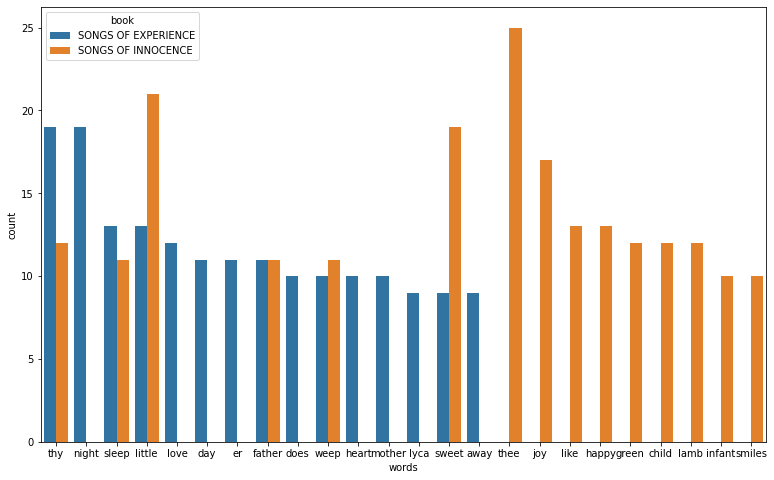

In [11]:
# bar plot to compare the number of words

fig, ax = plt.subplots(figsize = (13,8))

sns.barplot(
  data=interesting_features, ax = ax,
  x="words", y="count", 
  hue="book"
)

## Parsing XML text data

In [ ]:
from bs4 import BeautifulSoup
from bs4.element import Comment
import pandas as pd
import numpy as np
import requests

In [ ]:
url = 'https://www.bundestag.de/resource/blob/908848/b19bebca7930333f6321435fe54d2ba0/20049-data.xml'

page = requests.get(url)

soup = BeautifulSoup(page.content, features="xml")
soup.find_all('rede')[1].find('title')

In [157]:
from typing import final

final_df = pd.DataFrame(columns= ['speaker', 'content'])

for intervention in soup.find_all('rede'): # find the rede element (it locates the speaches)
    if intervention.find('titel') != None:
        title = intervention.find('titel').text
    else:
        title = ''
    if intervention.find('vorname') != None:
        vorname = intervention.find('vorname').text
    else:
        vorname = ''
    if intervention.find('nachname') != None:
        name =  intervention.find('nachname').text
    else:
        name = ''
    speaker = title + ' ' + vorname + ' ' + name # combine info extract before to build the speaker name
    content = ''
    speach_parts = intervention.find_all(klasse = ['J', 'O', 'J_1']) # speaches are cointained in the class ['J', 'O', 'J_1']
    for part in speach_parts:
        content += part.text # append each test part in the content element 
    
    dictionary = {'speaker' : speaker, 'content' : content} # dictionary to build the dataframe

    final_df = final_df.append(dictionary, ignore_index=True) # create the final dataframe

final_df

,speaker,content
0,Dr. Florian Toncar,Frau Präsidentin! Liebe Kolleginnen und Kolleg...
1,Dr. Mathias Middelberg,Geschätzte Frau Präsidentin! Liebe Kolleginnen...
2,Dennis Rohde,Frau Präsidentin! Liebe Kolleginnen und Kolleg...
3,Peter Boehringer,Frau Präsidentin! Wir sprechen heute über eine...
4,Sven-Christian Kindler,Sehr geehrte Frau Präsidentin! Meine Damen und...
...,...,...
94,Nadine Heselhaus,Sehr geehrte Frau Präsidentin! Meine Damen und...
95,Jürgen Braun,Frau Präsidentin! Meine sehr verehrten Damen u...
96,Dr. Franziska Kersten,Verehrte Frau Präsidentin! Liebe Kolleginnen u...
97,Uwe Feiler,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...


## Using regular expression

In [158]:
import re

kohle = '[Kk]{1}[Oo]{1}[H h]{1}[L l]{1}[E e]{1}[A-Za-z]*' # regex for Kohle

all_text = ' '.join(list(final_df['content'])) # join all the speaches

list_of_kohle = re.findall(kohle, all_text) # find the regex expression in all the speaches

d = {} #dictionary, the keys are the words and the value is the occurancies
for i in list_of_kohle:
    d[i] = all_text.count(i)
d

{'Kohle': 9, 'Kohlelieferungen': 1, 'Kohletransporten': 1, 'Kohlendioxid': 1}